In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler


data = pd.read_csv("covid_data.csv")
data.head()

,Unnamed: 0,date,region,confirmed,active,cured,deaths
0,0,2020-03-27,Andaman and Nicobar Islands,1,1.0,0.0,0.0
1,1,2020-03-28,Andaman and Nicobar Islands,6,6.0,0.0,0.0
2,2,2020-03-29,Andaman and Nicobar Islands,9,9.0,0.0,0.0
3,3,2020-03-30,Andaman and Nicobar Islands,9,9.0,0.0,0.0
4,4,2020-03-31,Andaman and Nicobar Islands,10,10.0,0.0,0.0


In [9]:
data['date'] = pd.to_datetime(data['date'])

In [10]:
data['date']

0       2020-03-27
1       2020-03-28
2       2020-03-29
3       2020-03-30
4       2020-03-31
           ...    
28563   2022-06-26
28564   2022-06-27
28565   2022-06-28
28566   2022-06-29
28567   2022-06-30
Name: date, Length: 28568, dtype: datetime64[ns]

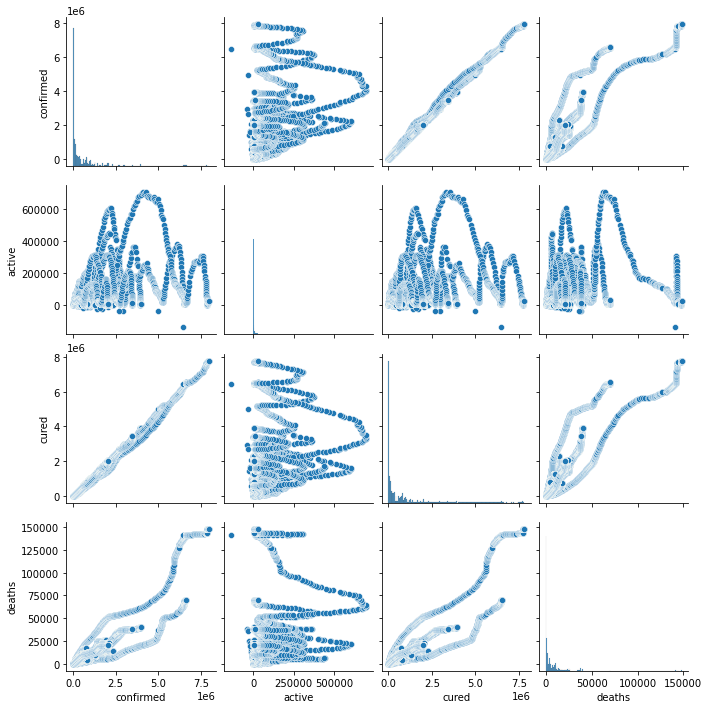

In [26]:
sns.pairplot(data[['confirmed', 'active', 'cured', 'deaths']])
plt.show()

In [11]:
train_size = 0.8
train_index = int(len(data) * train_size)
train_data = data[:train_index]
test_data = data[train_index:]

In [13]:
train_data['day_of_week'] = train_data['date'].dt.dayofweek
train_data['month'] = train_data['date'].dt.month
test_data['day_of_week'] = test_data['date'].dt.dayofweek
test_data['month'] = test_data['date'].dt.month


C:\Users\Nupur\AppData\Local\Temp\ipykernel_28268\425512974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day_of_week'] = train_data['date'].dt.dayofweek
C:\Users\Nupur\AppData\Local\Temp\ipykernel_28268\425512974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['month'] = train_data['date'].dt.month
C:\Users\Nupur\AppData\Local\Temp\ipykernel_28268\425512974.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [22]:
lr_model = LinearRegression()
lr_features = ['confirmed', 'active', 'cured']  
lr_train_X = train_data[lr_features]
lr_train_y = train_data['deaths']
lr_model.fit(lr_train_X, lr_train_y)
lr_test_X = test_data[lr_features]
lr_test_y = test_data['deaths']
lr_predictions = lr_model.predict(lr_test_X)

In [23]:
lr_mae = mean_absolute_error(lr_test_y, lr_predictions)
lr_mse = mean_squared_error(lr_test_y, lr_predictions)
lr_rmse = mean_squared_error(lr_test_y, lr_predictions, squared=False)
lr_r2 = r2_score(lr_test_y, lr_predictions)

In [24]:
print("Linear Regression Metrics:")
print("Mean Absolute Error:", lr_mae)
print("Mean Squared Error:", lr_mse)
print("Root Mean Squared Error:", lr_rmse)
print("R-squared:", lr_r2)

Linear Regression Metrics:
Mean Absolute Error: 2.9757929994072367e-10
Mean Squared Error: 1.6513016475277747e-19
Root Mean Squared Error: 4.0636211038035705e-10
R-squared: 1.0


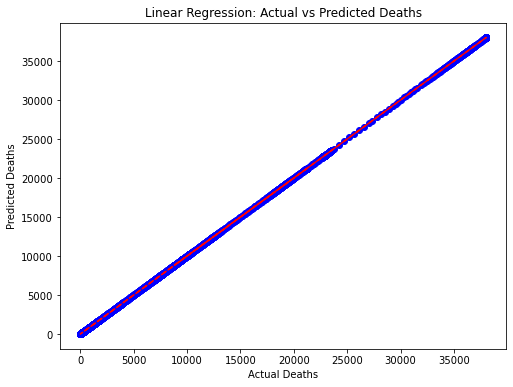

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(lr_test_y, lr_predictions, color='blue')
plt.plot(lr_test_y, lr_test_y, color='red', linestyle='--')
plt.title('Linear Regression: Actual vs Predicted Deaths')
plt.xlabel('Actual Deaths')
plt.ylabel('Predicted Deaths')
plt.show()

In [14]:
rf_model = RandomForestRegressor()
rf_features = ['day_of_week', 'month', 'confirmed', 'active', 'cured']  
rf_train_X = train_data[rf_features]
rf_train_y = train_data['deaths']
rf_model.fit(rf_train_X, rf_train_y)
rf_test_X = test_data[rf_features]
rf_test_y = test_data['deaths']
rf_predictions = rf_model.predict(rf_test_X)
rf_rmse = mean_squared_error(rf_test_y, rf_predictions, squared=False)

In [15]:
rf_predictions

array([ 9193.09,  9466.74, 10490.65, ..., 14868.15, 14876.37, 14885.99])

In [16]:
rf_rmse 

5173.673942739031

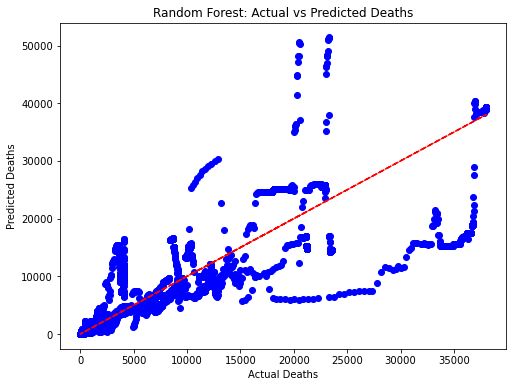

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(rf_test_y, rf_predictions, color='blue')
plt.plot(rf_test_y, rf_test_y, color='red', linestyle='--')
plt.title('Random Forest: Actual vs Predicted Deaths')
plt.xlabel('Actual Deaths')
plt.ylabel('Predicted Deaths')
plt.show()

C:\Users\Nupur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


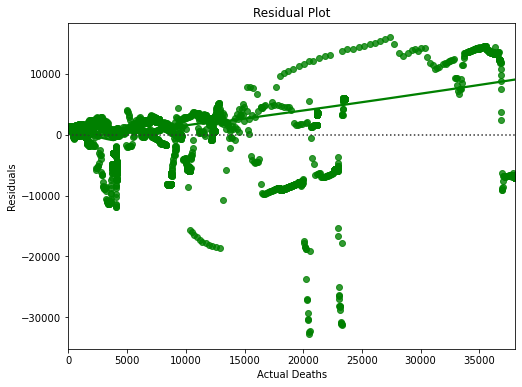

In [19]:
residuals = rf_test_y - rf_predictions
plt.figure(figsize=(8, 6))
sns.residplot(rf_test_y, residuals, lowess=True, color='green')
plt.title('Residual Plot')
plt.xlabel('Actual Deaths')
plt.ylabel('Residuals')
plt.show()

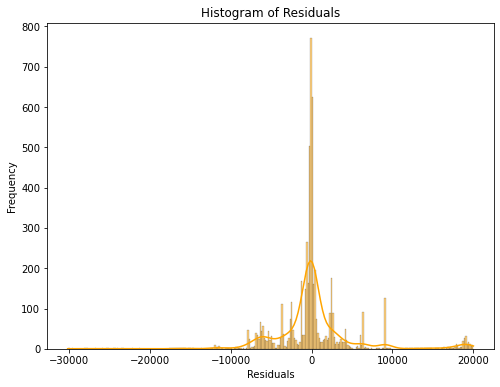

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='orange')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [17]:
rf_mae = mean_absolute_error(rf_test_y, rf_predictions)
rf_mse = mean_squared_error(rf_test_y, rf_predictions)
rf_rmse = mean_squared_error(rf_test_y, rf_predictions, squared=False)
rf_r2 = r2_score(rf_test_y, rf_predictions)

print("Random Forest Metrics:")
print("Mean Absolute Error:", rf_mae)
print("Mean Squared Error:", rf_mse)
print("Root Mean Squared Error:", rf_rmse)
print("R-squared:", rf_r2)

Random Forest Metrics:
Mean Absolute Error: 2797.432754637732
Mean Squared Error: 26766902.065776832
Root Mean Squared Error: 5173.673942739031
R-squared: 0.7477404964655785


In [27]:
scaler = MinMaxScaler()
lstm_data = data[['date', 'deaths']].copy() 
lstm_data['date'] = pd.to_numeric(lstm_data['date'])
lstm_data['deaths'] = scaler.fit_transform(lstm_data['deaths'].values.reshape(-1, 1))

def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

In [29]:
sequence_length = 10
X, y = create_sequences(lstm_data['deaths'], sequence_length)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, epochs=25, batch_size=32)
lstm_predictions = model.predict(X_test)
lstm_rmse = mean_squared_error(y_test, lstm_predictions, squared=False)

Epoch 1/25
714/714 [==============================] - 12s 12ms/step - loss: 5.3327e-04
Epoch 2/25
714/714 [==============================] - 7s 10ms/step - loss: 2.8801e-04
Epoch 3/25
714/714 [==============================] - 8s 12ms/step - loss: 1.9546e-04
Epoch 4/25
714/714 [==============================] - 8s 11ms/step - loss: 1.5368e-04
Epoch 5/25
714/714 [==============================] - 7s 10ms/step - loss: 1.3195e-04
Epoch 6/25
714/714 [==============================] - 7s 9ms/step - loss: 1.1370e-04
Epoch 7/25
714/714 [==============================] - 7s 10ms/step - loss: 9.2926e-05
Epoch 8/25
714/714 [==============================] - 9s 13ms/step - loss: 9.7267e-05
Epoch 9/25
714/714 [==============================] - 11s 15ms/step - loss: 1.0413e-04
Epoch 10/25
714/714 [==============================] - 10s 14ms/step - loss: 9.6450e-05
Epoch 11/25
714/714 [==============================] - 9s 13ms/step - loss: 8.4686e-05
Epoch 12/25
714/714 [=============================

In [30]:
print("LSTM RMSE:", lstm_rmse)

LSTM RMSE: 0.002930264121627756


In [31]:
loss = model.evaluate(X_test, y_test)
print("LSTM Model Loss:", loss)

predictions = model.predict(X_test)

179/179 [==============================] - 3s 3ms/step - loss: 8.5864e-06
LSTM Model Loss: 8.586447620473336e-06
179/179 [==============================] - 0s 3ms/step


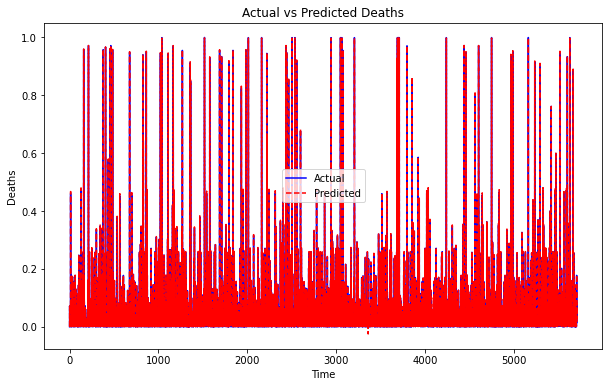

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', linestyle='-', color='blue')
plt.plot(predictions, label='Predicted', linestyle='--', color='red')
plt.title('Actual vs Predicted Deaths')
plt.xlabel('Time')
plt.ylabel('Deaths')
plt.legend()
plt.show()

Thus, we see that the three models are able to effectively predict the spread (number of deaths) of covid in India. A tableau dahsboard utilizes the other features for an in-depth analysis and visualization